<a href="https://colab.research.google.com/github/Sanjay2410/OIBSIP/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Advertising.csv')

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

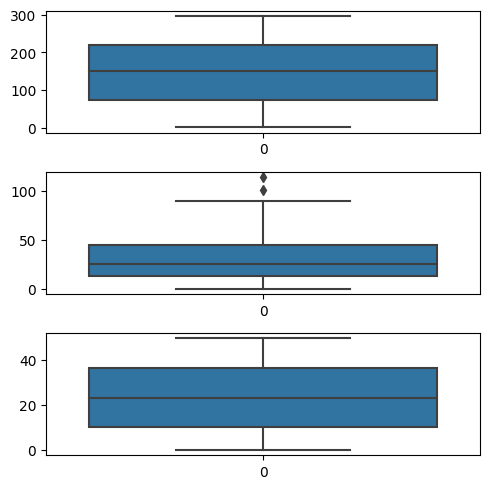

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

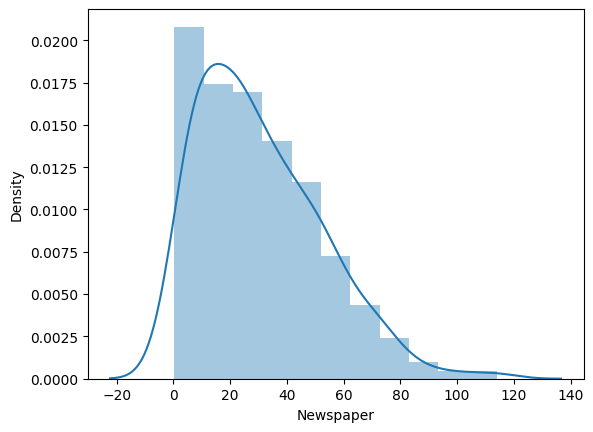

In [ ]:
sns.distplot(df['Newspaper'])

In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [ ]:
data = df.copy()

In [ ]:
data.loc[data['Newspaper'] >= 93,'Newspaper'] = 93

<Axes: >

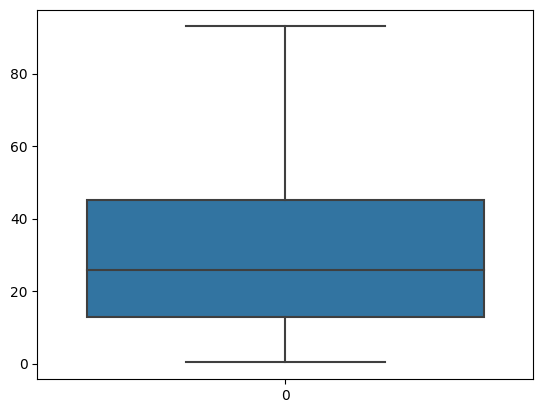

In [ ]:
sns.boxplot(data['Newspaper'])

<Axes: >

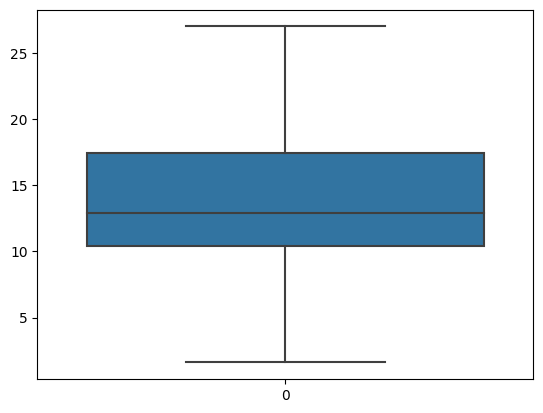

In [ ]:
sns.boxplot(data['Sales'])

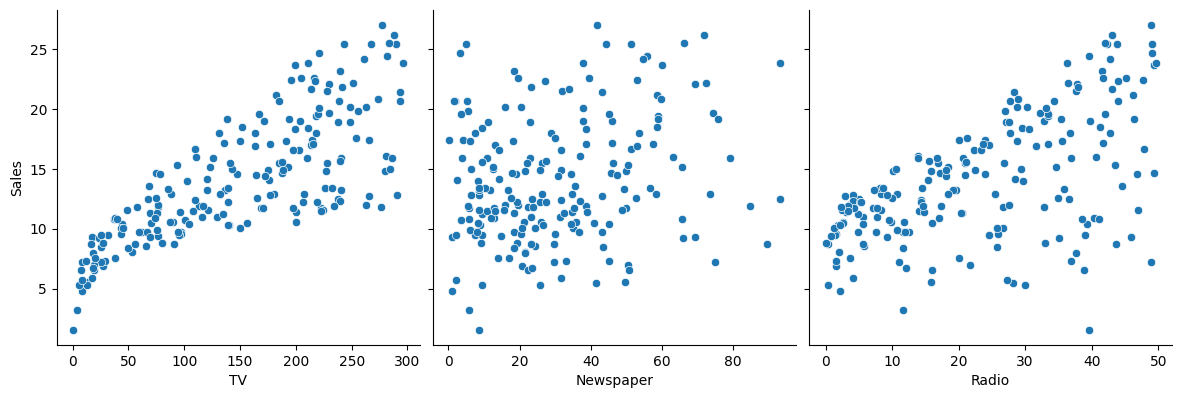

In [ ]:
sns.pairplot(data,x_vars = ['TV', 'Newspaper', 'Radio'],
             y_vars = 'Sales', height = 4, aspect = 1, kind = 'scatter')
plt.show()

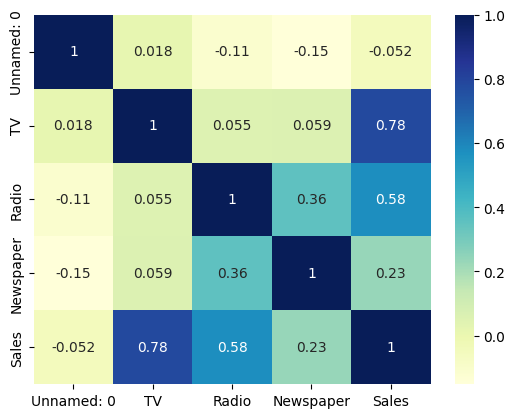

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales'] > +0.5) | (df.corr()["Sales"] < -0.5)].index)

In [ ]:
print(important_features)

['TV', 'Radio', 'Sales']


In [ ]:
x = data['TV']
y = data['Sales']

In [ ]:
x = x.values.reshape(-1,1)

In [ ]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(x.shape, y.shape)

(200, 1) (200,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.33)

In [ ]:
print(x_train.shape, y_train.shape)

(134, 1) (134,)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(x_train)

In [ ]:
knn_test_pred = knn.predict(x_test)

In [ ]:
print(knn_train_pred, knn_test_pred)

[17.16 19.16 16.02 16.36 19.46 13.22 16.52 18.14  7.1  13.12 18.82 16.9
 17.52 15.98 16.02 17.22 17.52 11.68 17.16  5.58 12.06 17.66  5.58 20.54
 14.64 19.14  7.52 10.94  9.34  7.28 12.38 13.   19.8  19.74 15.78  9.72
 17.66 12.06 13.56 21.86 14.44 12.38 16.66 17.52 15.7  18.82 19.84 13.7
  7.52 19.16 16.9  10.88  9.72 16.34  6.56 10.96 10.02 15.26 16.02 15.78
 13.7   7.28 12.1  21.86 11.96 11.54 12.7  12.06  7.52 11.   20.14 18.14
 19.46 10.94 19.16 14.44  5.58 16.44 16.52 15.56  7.1  15.78 12.06 13.7
 18.1  13.12 10.96  9.44 19.4   9.34 16.36 13.4  12.38 16.86 11.62  6.56
 21.4  17.16  7.1  21.4  10.94 18.1  18.82  5.58 19.4   9.72 10.96  5.74
  9.72 14.44 10.88 21.4  12.1  12.1  15.56 14.6  10.48 15.26 13.6  19.74
 19.74 16.66  9.72 16.22 12.1   9.72 18.2  13.   21.86 12.38  5.98 14.48
  4.94 10.88] [11.68 16.56 10.02  8.84  9.72  7.1  11.68  8.24 15.98  7.28 19.24 13.22
 21.86 11.62 15.26 11.62 18.14 13.12 15.98 15.78 18.1  14.48 21.4  17.9
 16.22 17.78 14.94 12.06 10.96 14.14 12.2

In [ ]:
Results = pd.DataFrame(columns = ["Model", "Train R2", "Test R2", "Test RMSE", "Variance"])

In [ ]:
r2 = r2_score(y_test, knn_test_pred)
r2_train = r2_score(y_train, knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test, knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K Nearest Neighbors", "Train R2": r2_train, "Test R2": r2, "Test RMSE": rmse, "Variance": variance}, ignore_index=True)
print("R2:", r2)
print("RMSE:", rmse)

R2: 0.4555209025257706
RMSE: 3.755748724934681


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K Nearest Neighbors,0.691846,0.455521,3.755749,0.236325


In [ ]:
svr = SVR().fit(x_train, y_train)
svr

SVR()

In [ ]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [ ]:
print(svr_train_pred, svr_test_pred)

[16.0871364  17.16692982 18.10326121 16.49986037 18.15752688 13.69811092
 16.74307485 17.8588887   7.09986049 13.01678591 18.17022836 15.64090449
 17.53936302 16.21598783 18.10326121 18.01352114 17.45192174 11.45711643
 15.95788114  6.73379008 13.19080851 17.44253676  6.75841493 18.42254196
 14.65545765 18.05829913  7.03514104 11.65641835  9.49167858  7.51977425
 12.66659208 12.1061533  18.40208384 18.35471488 18.21753814  9.21159804
 17.41892786 13.30040735 13.6016334  17.88542774 14.91815483 12.65665992
 16.59115032 17.53936302 15.67600679 18.251427   17.35658672 12.33211776
  7.03514104 16.96207376 15.4720459  10.72610019  8.14967544 15.02290288
  6.89222878 10.23100824  8.58425834 14.41984507 18.12624639 18.17769543
 12.29987132  7.3279438  10.66584806 17.63555945 10.27004742 10.83849128
 11.25415537 13.29681759  7.02347563 12.031759   18.34873865 17.83615097
 18.13929428 11.67012891 17.20265313 14.95107137  6.69669777 15.83441896
 16.74864392 18.15657535  7.09569349 18.17769543 13

In [ ]:
r2 = r2_score(y_test, svr_test_pred)
r2_train = r2_score(y_train, svr_train_pred)
variance = r2_train - r2
Results = Results.append({"Model":"K Nearest Neighbors", "Train R2": r2_train, "Test R2": r2, "Test RMSE": rmse, "Variance": variance}, ignore_index=True)
print("R2:", r2)
print("RMSE:", rmse)

R2: 0.5400777139340077
RMSE: 3.755748724934681


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K Nearest Neighbors,0.691846,0.455521,3.755749,0.236325
1,K Nearest Neighbors,0.620648,0.540078,3.755749,0.080571


In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_constant = sm.add_constant(x_train)

In [ ]:
model = sm.OLS(y_train, x_train_constant).fit()

In [ ]:
model.params

const    6.870816
x1       0.048737
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     232.3
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           6.91e-31
Time:                        16:47:44   Log-Likelihood:                -344.52
No. Observations:                 134   AIC:                             693.0
Df Residuals:                     132   BIC:                             698.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8708      0.549     12.512      0.0

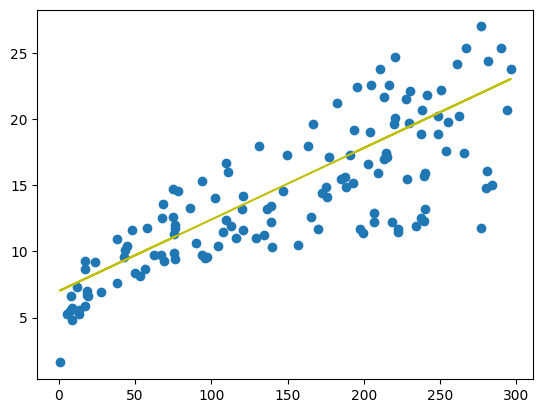

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9955 + 0.0541 * x_train, 'y')
plt.show()

In [ ]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

15     6.005895
11     0.065263
21    -5.941076
40    -0.140141
150   -4.451406
         ...   
151   -1.168042
8     -2.489958
163    3.160618
130   -5.304932
80     1.205646
Name: Sales, Length: 134, dtype: float64

In [ ]:
y_train_pred

array([16.39410505, 17.33473699, 18.4410761 , 16.74014063, 20.55140578,
       14.16680559, 16.94971148, 18.08529304,  7.78707914, 13.26028984,
       20.52703708, 16.02370076, 17.71001501, 16.50132734, 18.4410761 ,
       18.29973762, 17.61741394, 11.24256123, 16.28688276,  7.22659897,
       13.50885061, 17.60766646,  7.28021012, 19.31834941, 15.16592242,
       20.72686045,  7.70909929, 11.44725834,  9.67321676,  8.21109457,
       12.74367334, 11.96874858, 19.87882958, 18.99668253, 18.65064695,
        9.47826713, 17.58329776, 13.65993657, 14.04983582, 20.99004244,
       15.40473571, 12.72905211, 16.81812048, 17.71001501, 16.05294321,
       20.35645616, 17.51993913, 12.26604676,  7.70909929, 17.1446611 ,
       15.88236229, 10.58947999,  8.72283734, 15.49733678,  7.51414967,
       10.20445448,  9.03963048, 14.94173035, 18.48006603, 18.5726671 ,
       12.22218309,  8.03076617, 10.54074258, 21.31658306, 10.23369692,
       10.68208106, 11.04761161, 13.65506283,  7.69447807, 11.87

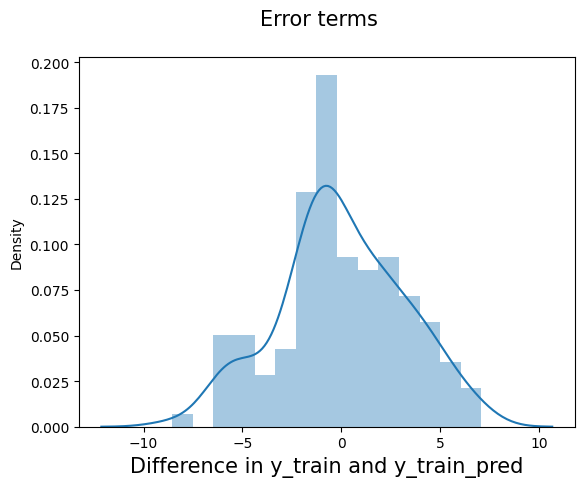

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

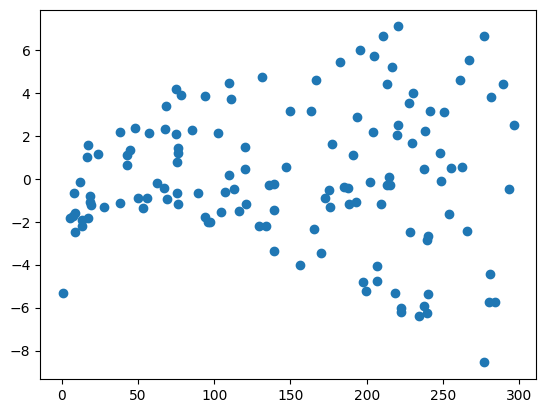

In [ ]:
plt.scatter(x_train, res)
plt.show()

In [ ]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [ ]:
y_pred

array([11.17432886, 15.68253892,  9.04937796,  8.4060442 ,  8.66922619,
        7.82606907, 11.12071771,  8.26470572, 17.87572219,  8.17697839,
       17.4809492 , 14.17167933, 21.03877984, 11.55935437, 15.07819509,
       11.622713  , 18.18276785, 13.28953228, 16.50132734, 18.72375306,
       17.94395456, 14.8881192 , 19.79597599, 17.78799486, 16.56468597,
       17.43708554, 15.21953356, 13.70867398, 10.09235845, 14.25453292,
       12.87039059, 10.24344441, 10.77955587,  7.07063927, 11.76405147,
       10.31167677, 20.21024394, 16.60854964, 13.83539123, 16.0285745 ,
       15.49733678, 14.82963431, 20.69274426, 17.51506539, 16.57443345,
        8.08925106,  8.79594345, 13.4601132 ,  8.0941248 ,  9.77556531,
       20.80971404, 21.14600214, 20.88769389, 10.44814151,  7.29483134,
       12.99710785, 19.68387996, 11.27667741, 17.13978736, 15.88236229,
        7.74321548, 13.75741138, 12.5828399 , 13.5917042 , 18.56291962,
        8.1184935 ])

In [ ]:
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.3989585053939306

In [ ]:
r2 = r2_score(y_test, y_pred)

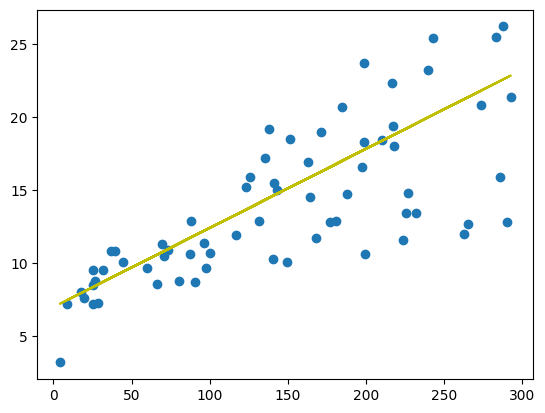

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.9955 + 0.0541 * x_test, 'y')
plt.show()